In [1]:
import matplotlib.pyplot as plt
import pandas as pd

# Pair Programming Visualización II

Sigamos con más visualizaciones. En este caso trabajaremos con el csv que generamos en el ejercicio de pair programming de Pandas V, ese en el que habíamos unido distintos csv en uno. Al final nos habíamos quedado con los siguientes conjuntos de datos
- El fichero de la unión de todos los conjuntos de datos de los distintos años
- El fichero con la unión de los datos de puestos y empleados.
- El fichero de los agentes.

El objetivo de hoy, mejorar algunas de las gráficas que hicimos en el ejericio de pair programming de ayer y crear algunas nuevas aprovechando que tenemos algunas columnas nuevas en dataframe

In [5]:
df_años = pd.read_csv('../pandas/datos/años.csv', index_col=0)
df_años.head(2)

,ID Ticket,Fecha,ID Empleado,ID Agente,Categoría,Tipo,Severidad,Prioridad,Días Resolución,Satisfacción
0,GDDENR-5042564453,2016-07-13,1735.0,4.0,Acceso&%Login,Problema,0 - Sin Clasificar,0 - Sin Asignar,0.0,5.0
1,GDDENR-8042508060,2016-05-18,1566.0,10.0,Acceso&%Login,Problema,0 - Sin Clasificar,0 - Sin Asignar,0.0,5.0


In [6]:
df_emp_pues = pd.read_csv('../pandas/datos/empleados_puestos.csv', index_col=0)
df_emp_pues.head(2)

,Turno,ID Empleado,Apellido,Nombre,ID Puesto,Email,Puesto,Departamento,Tipo Puesto
0,A,6,VILLA,JESUS,50-32200,jesus.villa@tractchun.com,Comprador de Materiales,CONTROL DE PRODUCCION,Administrativo
1,NaN,10,MENDEZ,RICARDO,15-24100,ricardo.mendez@tractchun.com,Supervisor de Producción,PRODUCCION,Mandos Medios


In [8]:
df_agentes = pd.read_csv('../pandas/datos/Agentes.csv')
df_agentes.head(2)

,ID Agente,Nombre,email,Fecha de Nacimiento
0,1,Mata Lucero,lucero.mata@tractchun.com,1989/4/28
1,2,JesusGrajeda,jesus.grajeda@tractchun.com,1979/1/1


1. Ayer creamos un par de gráficas para los tickets de la categoría "Software" y "Hardware", donde visualizamos el número de clientes que teníamos en cada grupo de satisfacción. Hoy tendréis que hacer dos gráficas con subplots:


In [9]:
df_sw_hw = df_años[(df_años["Categoría"] == "Hardware") | (df_años["Categoría"] == "Software")]
df_sw_hw.head(2)

,ID Ticket,Fecha,ID Empleado,ID Agente,Categoría,Tipo,Severidad,Prioridad,Días Resolución,Satisfacción
4,GDLEER-0042524120,2016-06-03,1842.0,31.0,Software,Problema,2 - Normal,0 - Sin Asignar,0.0,5.0
5,GDLEER-0142608095,2016-08-26,59.0,20.0,Software,Problema,2 - Normal,0 - Sin Asignar,1.0,1.0


- En la primera debéis mostrar la cantidad de tickets en función del tipo (si es Problema o Solicitud), cada subplot corresponderá a cada una de las categorías. Debéis:
    - Poner nombre a los ejes de cada uno de los subplots
    - Poner un títulos a cada uno de los subplots
    - Poner el color de las líneas en negro.
    - Establecer el tamaño de la gráfica a 15 x 5
    - Ponerle marcadores a las gráficas
    - No incluir leyenda


In [10]:
df_tipo_hw = df_sw_hw[df_sw_hw["Categoría"] == "Hardware"]
df_valores_tipo_hw = df_tipo_hw["Tipo"].value_counts().reset_index()
df_valores_tipo_hw

,index,Tipo
0,Solicitud,7368
1,Problema,2364


In [11]:
df_tipo_sw = df_sw_hw[df_sw_hw["Categoría"] == "Software"]
df_valores_tipo_sw = df_tipo_sw["Tipo"].value_counts().reset_index()
df_valores_tipo_sw

,index,Tipo
0,Solicitud,14634
1,Problema,4931


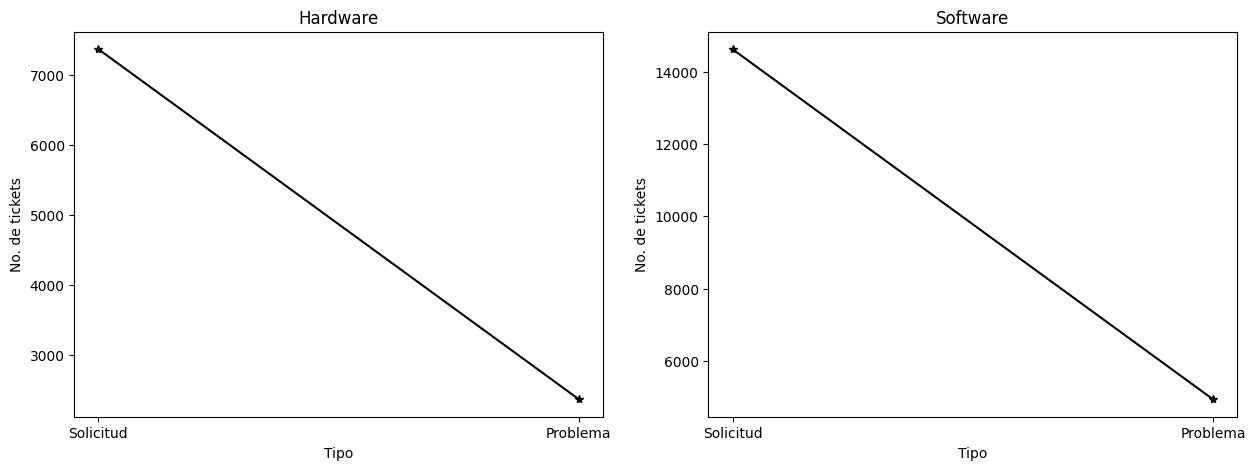

In [26]:
fig, ax = plt.subplots(1,2, figsize = (15,5))

ax[0].plot(df_valores_tipo_hw["index"], df_valores_tipo_hw["Tipo"], marker = "*", color = "black")
ax[1].plot(df_valores_tipo_sw["index"], df_valores_tipo_sw["Tipo"], marker = "*", color = "black")

ax[0].set_xlabel("Tipo")
ax[1].set_xlabel("Tipo")
ax[0].set_ylabel("No. de tickets")
ax[1].set_ylabel("No. de tickets")

ax[0].set_title("Hardware")
ax[1].set_title("Software")

plt.savefig("Visualizacion-II/tickets_por_tipo_cat.png")

plt.show()

- En la segunda debéis mostrar el número de tickets en función de la satisfacción.
    - De nuevo tendréis que ponerle nombre a los ejes y título a cada gráfica.
    - En este caso el subplot deberá tener dos filas y una columna
    - No incluir leyenda
    - Cambiar el color de las barras

In [13]:
df_tipo_hw = df_sw_hw[df_sw_hw["Categoría"] == "Hardware"]
df_valores_hw = df_tipo_hw["Satisfacción"].value_counts().reset_index()
df_valores_hw

,index,Satisfacción
0,5.0,5106
1,4.0,2691
2,1.0,1003
3,3.0,745
4,2.0,185


In [14]:
df_tipo_sw = df_sw_hw[df_sw_hw["Categoría"] == "Software"]
df_valores_sw = df_tipo_sw["Satisfacción"].value_counts().reset_index()
df_valores_sw

,index,Satisfacción
0,5.0,10240
1,4.0,5494
2,1.0,1972
3,3.0,1468
4,2.0,388


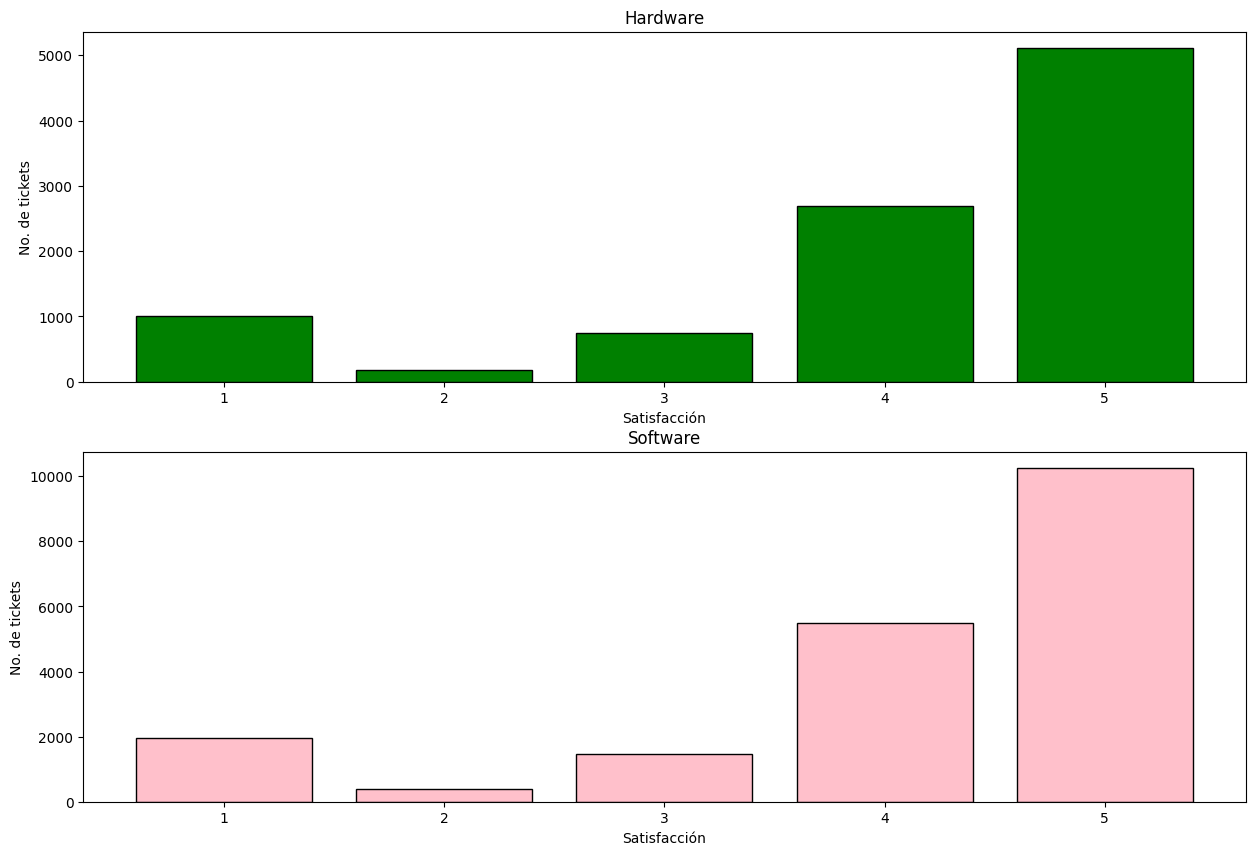

In [25]:
fig, ax = plt.subplots(2,1, figsize = (15,10))

ax[0].bar(df_valores_hw["index"], df_valores_hw["Satisfacción"], edgecolor = "black", facecolor = "green")
ax[1].bar(df_valores_sw["index"], df_valores_sw["Satisfacción"], edgecolor = "black", facecolor = "pink")

ax[0].set_xlabel("Satisfacción")
ax[1].set_xlabel("Satisfacción")
ax[0].set_ylabel("No. de tickets")
ax[1].set_ylabel("No. de tickets")

ax[0].set_title("Hardware")
ax[1].set_title("Software")

plt.savefig("Visualizacion-II/tickets_por_sat_cat.png")

plt.show()

2. Cread un subplot con dos gráficas, dónde en la primera tengamos el número de empleados por departamento y en la otra por tipo de puesto. Debéis:
    - Poner leyenda a la gráfica
    - Cada línea debe ir en un color
    - Ponerle nombre a los ejes y a la gráfica.
    - Poner marcadores a las lineas.

In [17]:
df_emp_pues.head(2)

,Turno,ID Empleado,Apellido,Nombre,ID Puesto,Email,Puesto,Departamento,Tipo Puesto
0,A,6,VILLA,JESUS,50-32200,jesus.villa@tractchun.com,Comprador de Materiales,CONTROL DE PRODUCCION,Administrativo
1,NaN,10,MENDEZ,RICARDO,15-24100,ricardo.mendez@tractchun.com,Supervisor de Producción,PRODUCCION,Mandos Medios


In [18]:
df_emp_dept_valores = df_emp_pues["Departamento"].value_counts().reset_index()
df_emp_dept_valores

,index,Departamento
0,PRODUCCION,475
1,INGENIERIA DE CALIDAD,395
2,MANTENIMIENTO,258
3,INGENIERIA DE MANUFACTURA,228
4,"SISTEMAS, TRAFICO Y ADUANAS",160
5,CONTROL DE PRODUCCION,127
6,MATERIALES,125
7,Recursos Humanos,117
8,"AUDITORIA INTERNA, CALIBRACION Y METROLOGIA",70
9,CONTABILIDAD,25


In [19]:
df_emp_pues_valores = df_emp_pues["Puesto"].value_counts().reset_index()
df_emp_pues_valores

,index,Puesto
0,Supervisor de Producción,458
1,Ingeniero de Manufactura,213
2,Supervisor de Aseguramiento de Calidad,186
3,Ingeniero de Calidad,162
4,Ingeniero de Procesos,96
...,...,...
59,Director de Aseguramiento de Calidad,2
60,Supervisor de captura,1
61,Secretaria de Ingeniería de Manufactura,1
62,Supervisor General de Aseg. de Calidad,1


/tmp/ipykernel_1506/1335276618.py:11: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[0].set_xticklabels(labels = df_emp_dept_valores["index"], rotation="vertical")
/tmp/ipykernel_1506/1335276618.py:12: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[1].set_xticklabels(labels = df_emp_pues_valores["index"], rotation="vertical")


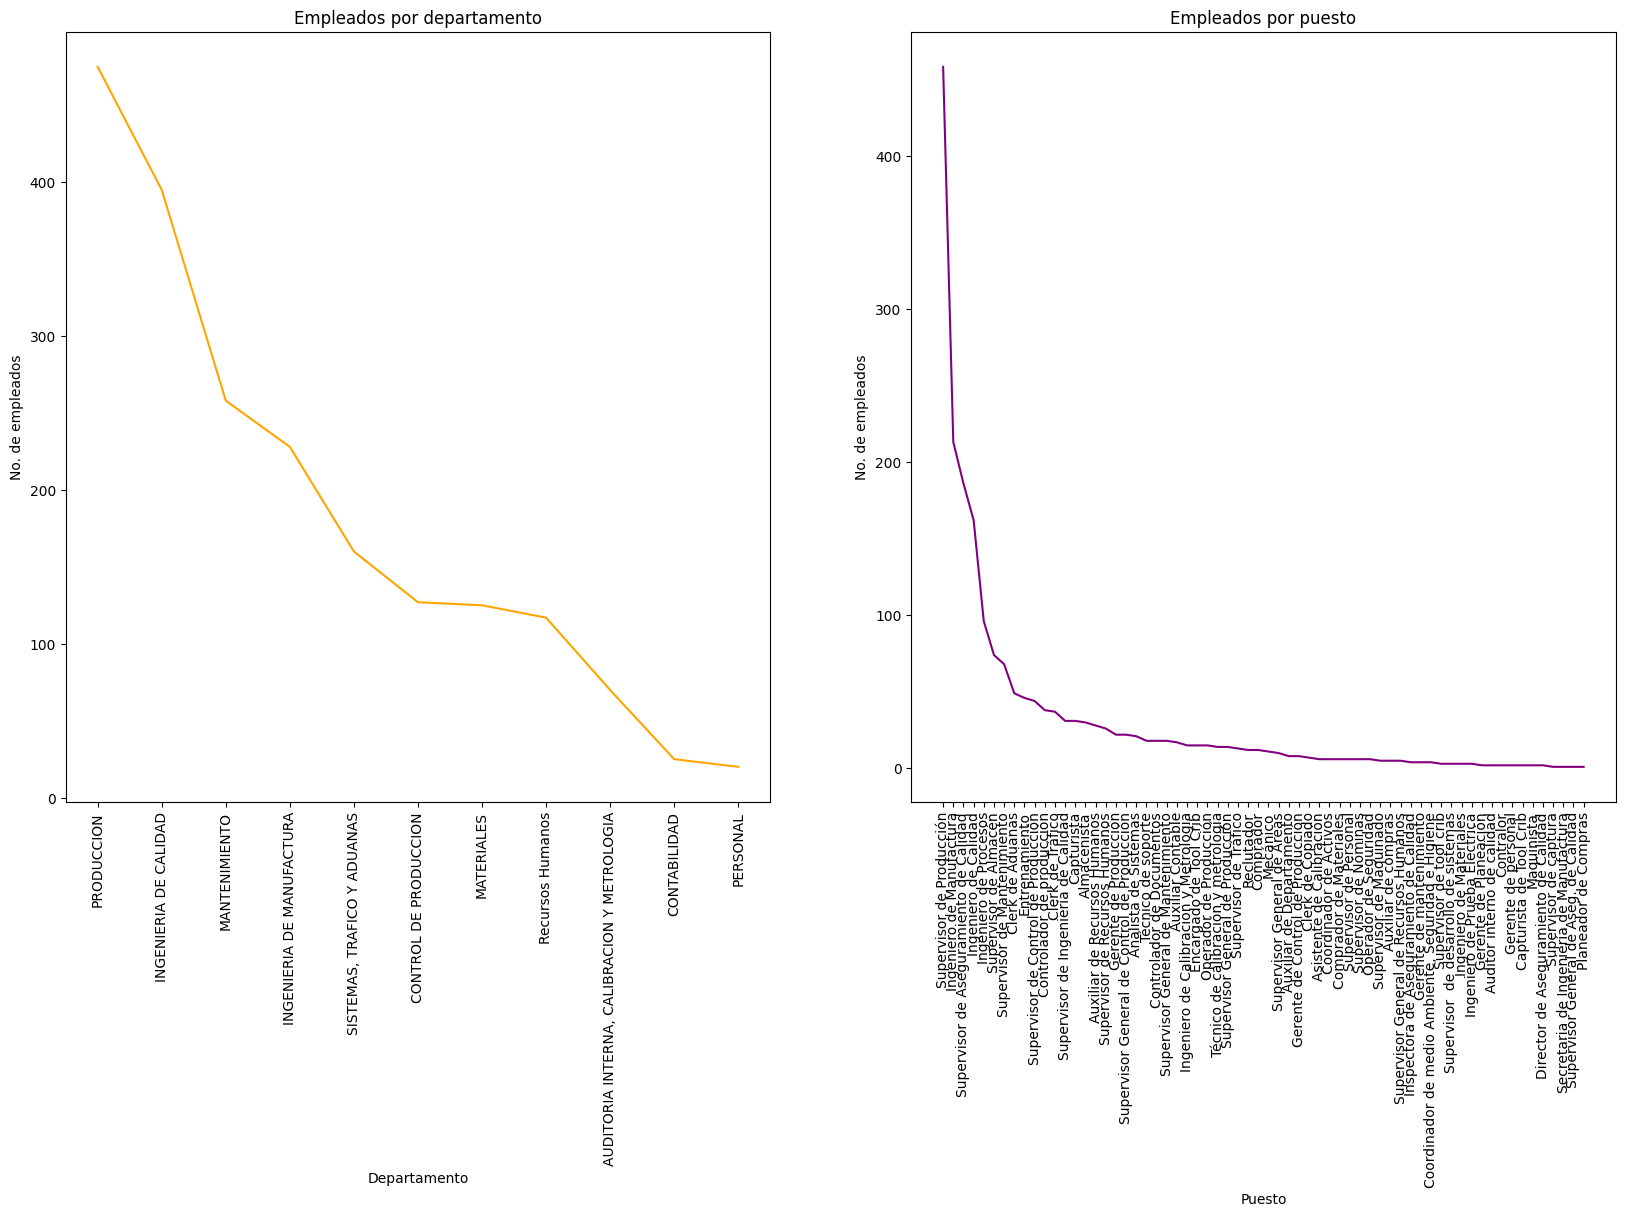

In [23]:
fig, ax = plt.subplots(1,2, figsize = (20,10))

ax[0].plot(df_emp_dept_valores["index"], df_emp_dept_valores["Departamento"], color = "orange")
ax[1].plot(df_emp_pues_valores["index"], df_emp_pues_valores["Puesto"], color = "purple")

ax[0].set_xlabel("Departamento")
ax[1].set_xlabel("Puesto")
ax[0].set_ylabel("No. de empleados")
ax[1].set_ylabel("No. de empleados")

ax[0].set_xticklabels(labels = df_emp_dept_valores["index"], rotation="vertical")
ax[1].set_xticklabels(labels = df_emp_pues_valores["index"], rotation="vertical")

ax[0].set_title("Empleados por departamento")
ax[1].set_title("Empleados por puesto")

plt.savefig("Visualizacion-II/empleados_por_dept_pues.png")

plt.show()

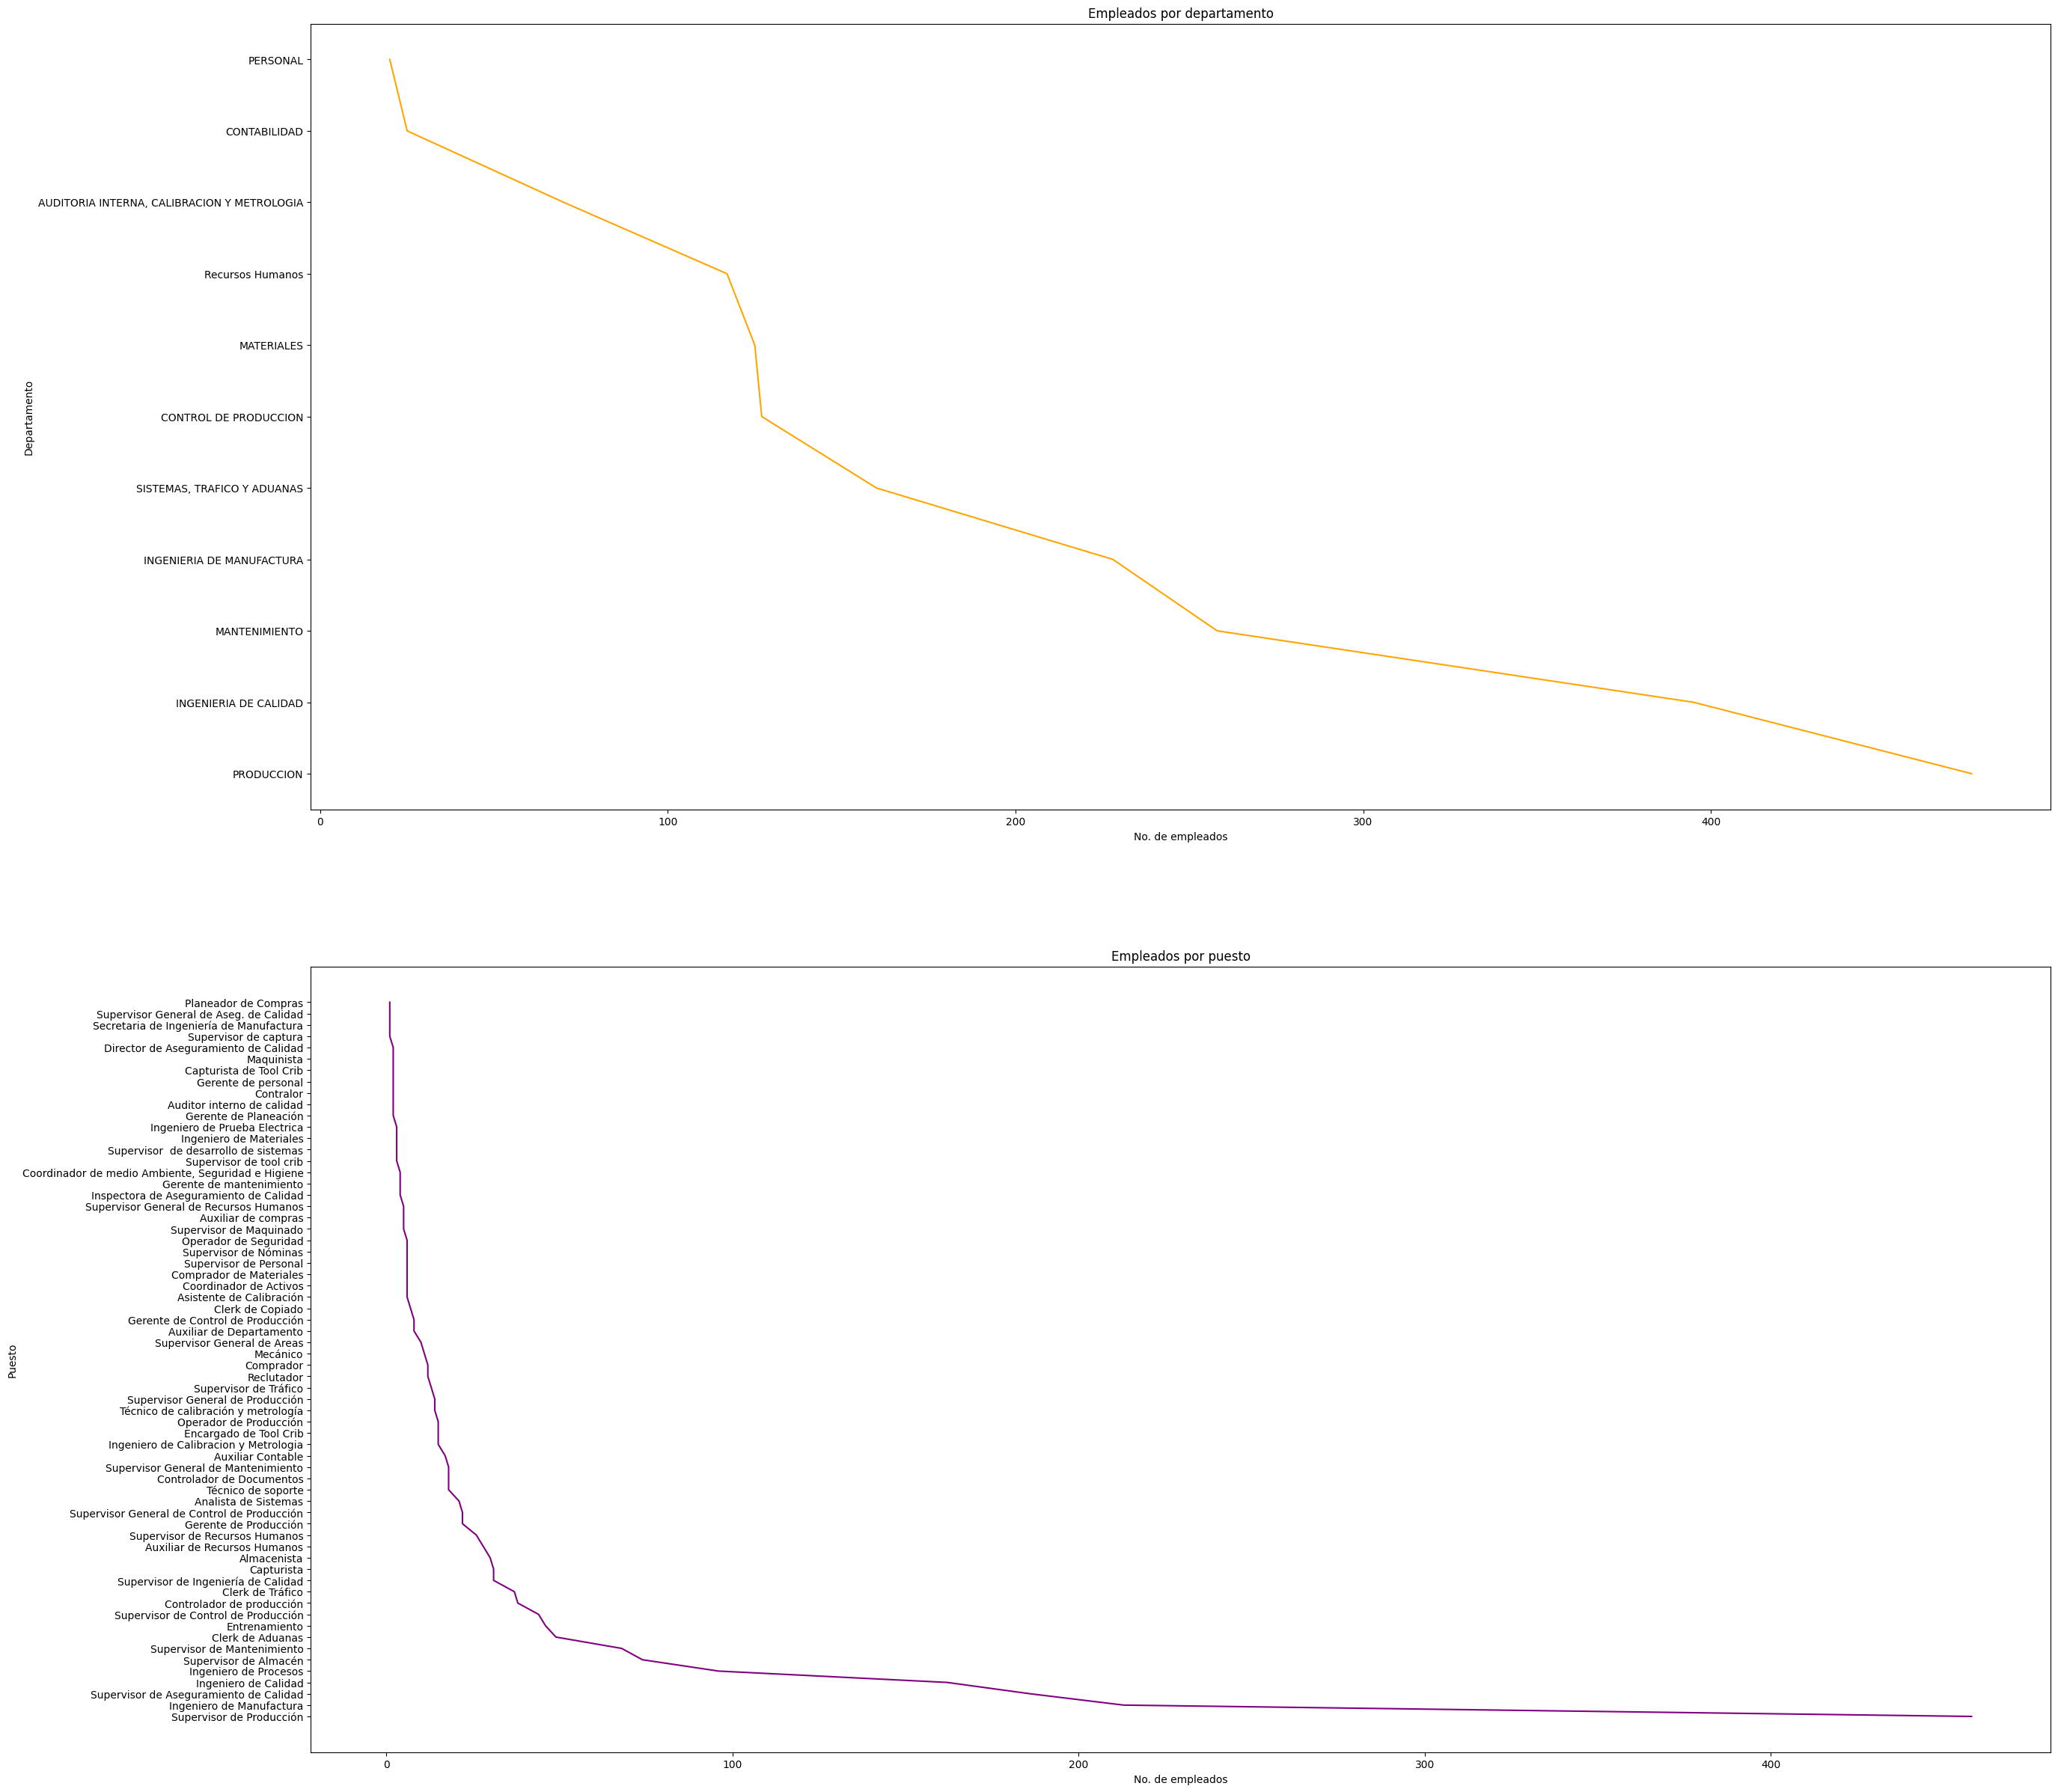

In [24]:
fig, ax = plt.subplots(2,1, figsize = (30,30))

ax[0].plot(df_emp_dept_valores["Departamento"], df_emp_dept_valores["index"], color = "orange")
ax[1].plot(df_emp_pues_valores["Puesto"], df_emp_pues_valores["index"], color = "purple")

ax[0].set_ylabel("Departamento")
ax[1].set_ylabel("Puesto")
ax[0].set_xlabel("No. de empleados")
ax[1].set_xlabel("No. de empleados")

ax[0].set_title("Empleados por departamento")
ax[1].set_title("Empleados por puesto")

plt.savefig("Visualizacion-II/empleados_por_dept_pues2.png")

plt.show()

3. Guardad las figuras creadas en cada caso. Podéis usar el formato que queráis. Guarda todas las fotos en una carpeta llamada Visualizacion-II.